#PORTFOLIO ASSIGNMENT
#CLASSIFICATION TASK

##Import Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mount the drive for dataset

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##About the Dataset

This dataset is sourced from **NASA's Open Data Portal** and is part of the **Global Landslide Catalog (GLC)**. The primary goal of the GLC is to catalog **rainfall-triggered landslide events** globally, regardless of size, impact, or location. It includes a diverse range of **mass movement events**, such as **landslides, mudslides, and rockfalls**, triggered by rainfall or other weather events.

Independent Variables
The dataset includes various independent variables related to landslide characteristics:

- **Landslide size**: Small, medium, large, and very large  
- **Landslide category**: Landslide, mudslide, rockfall, etc.  
- **Landslide trigger**: Rain, downpour, etc.  
- **Landslide setting**: Natural slope, above road, below road  
- **Location accuracy**: Given by latitude and longitude coordinates  

 Target Variable
The target variable for this analysis is **fatality_count**, representing the number of fatalities associated with each landslide event.

Dataset Overview
- **Total Columns**: 31  
- **Total Rows**: 11,034  
- **Preprocessing Challenges**:
  - Handling missing values in crucial columns like `fatality_count` and `landslide_size`
  - Encoding categorical variables such as `landslide_category` for use in modeling  

Data Source & Updates
This dataset was **last updated on March 7, 2016** and is part of ongoing efforts by **NASA Goddard Space Flight Center** to track landslide data globally for **hazard assessment and risk management**.

##Load the dataset

In [158]:
file_path = "/content/drive/MyDrive/Concepts and Technologies of AI/Portfolio/data_Global_Landslide_Catalog_Export_20250128.csv"

In [159]:
data = pd.read_csv(file_path)

In [160]:
# list of column names that contribute to modeling
columns_to_select = [
    'location_accuracy',
    'landslide_size',
    'admin_division_population',
    'gazeteer_distance',
    'latitude',
    'longitude',
]

dataset_selected_columns = data[columns_to_select]

# Check the selected dataframe info
dataset_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_accuracy          11031 non-null  object 
 1   landslide_size             11024 non-null  object 
 2   admin_division_population  9471 non-null   float64
 3   gazeteer_distance          9471 non-null   float64
 4   latitude                   11033 non-null  float64
 5   longitude                  11033 non-null  float64
dtypes: float64(4), object(2)
memory usage: 517.3+ KB


##Dataset Cleansing

In [161]:
# Remove rows with null in fatality_count (target variable) and admin_division_population (dependent variable)
df = dataset_selected_columns.dropna(subset=['admin_division_population', 'gazeteer_distance', 'landslide_size'])

df.isnull().sum()

,0
location_accuracy,0
landslide_size,0
admin_division_population,0
gazeteer_distance,0
latitude,0
longitude,0


In [162]:
size_mode = df.mode()['landslide_size'][0]
# Only 40 'unknown' values, hence imputing with mode value
df.loc[:,'landslide_size'] = df['landslide_size'].str.replace('unknown', size_mode)

In [163]:
# drop 'unknown', replace 'exact with 0km, drop suffix convert to int
df = df[df['location_accuracy']!='unknown']
df.loc[:,'location_accuracy'] = df['location_accuracy'].str.replace('exact', '0')
df.loc[:,'location_accuracy'] = df['location_accuracy'].str.replace('km', '')
df['location_accuracy'] = df['location_accuracy'].astype(int)

#Cleaned Dataset

In [164]:
dataset = df.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8931 entries, 0 to 11032
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_accuracy          8931 non-null   int64  
 1   landslide_size             8931 non-null   object 
 2   admin_division_population  8931 non-null   float64
 3   gazeteer_distance          8931 non-null   float64
 4   latitude                   8931 non-null   float64
 5   longitude                  8931 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 488.4+ KB


In [165]:
dataset.head()

,location_accuracy,landslide_size,admin_division_population,gazeteer_distance,latitude,longitude
0,5,small,1651.0,55.60925,-46.7748,167.6337
1,10,medium,2009.0,26.14437,-45.9034,170.0982
2,5,medium,1200.0,3.45468,-45.8767,170.6273
3,5,medium,1200.0,5.55301,-45.8727,170.5863
4,1,small,114347.0,1.43901,-45.8618,170.5090


In [166]:
dataset.tail()

,location_accuracy,landslide_size,admin_division_population,gazeteer_distance,latitude,longitude
11027,25,medium,1690.0,35.97774,64.4112,-14.5624
11028,1,large,1001.0,83.92592,65.0167,-16.7406
11029,1,large,1001.0,84.36572,65.0216,-16.6849
11030,5,small,2624.0,76.97209,65.9794,-21.4541
11032,10,small,0.0,6.46542,72.6275,-77.8416


#Exploratory Data Analysis

In [167]:
# Summary Statistics
dataset.describe()

,location_accuracy,admin_division_population,gazeteer_distance,latitude,longitude
count,8931.000000,8.931000e+03,8931.000000,8931.000000,8931.000000
mean,11.625126,1.616933e+05,11.618759,25.796193,0.495218
std,16.603967,8.430960e+05,15.339423,20.574631,100.498511
min,0.000000,0.000000e+00,0.000030,-46.774800,-170.799800
25%,1.000000,2.033000e+03,2.300295,13.510700,-107.224800
50%,5.000000,7.609000e+03,6.020580,30.409100,7.465400
75%,10.000000,3.493850e+04,15.451790,41.856850,93.361300
max,250.000000,1.269184e+07,199.448930,72.627500,179.410400


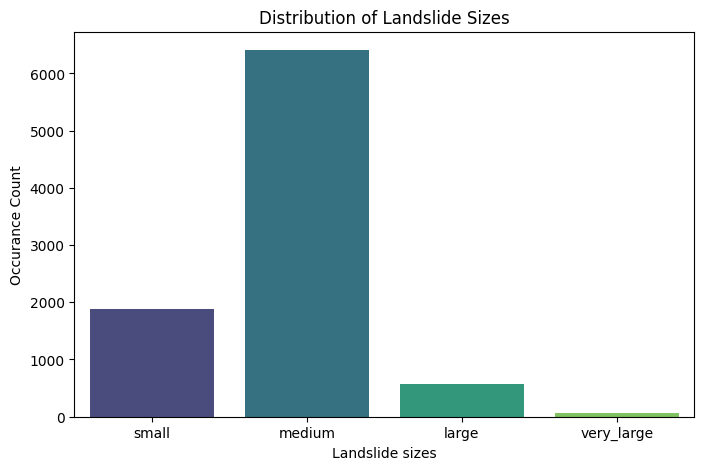

In [168]:
plt.figure(figsize=(8,5))
sns.countplot(x="landslide_size", hue="landslide_size", data=dataset, palette="viridis")
plt.title("Distribution of Landslide Sizes")
plt.xlabel("Landslide sizes")
plt.ylabel("Occurance Count")
plt.show()

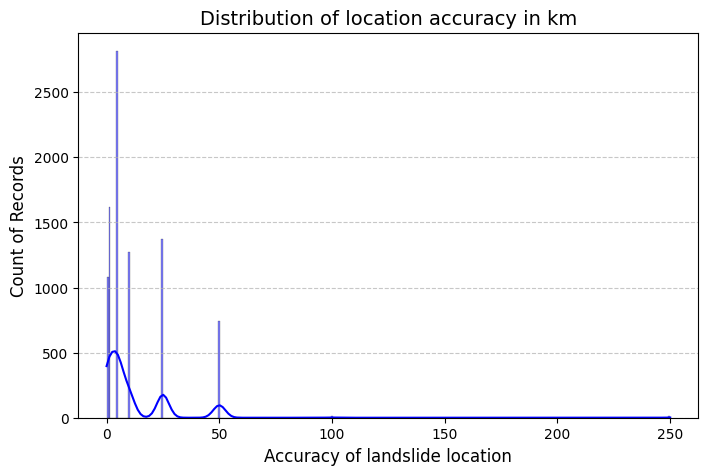

In [169]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['location_accuracy'], bins='auto', kde=True, color='blue')

plt.title('Distribution of location accuracy in km', fontsize=14)
plt.xlabel('Accuracy of landslide location', fontsize=12)
plt.ylabel('Count of Records', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

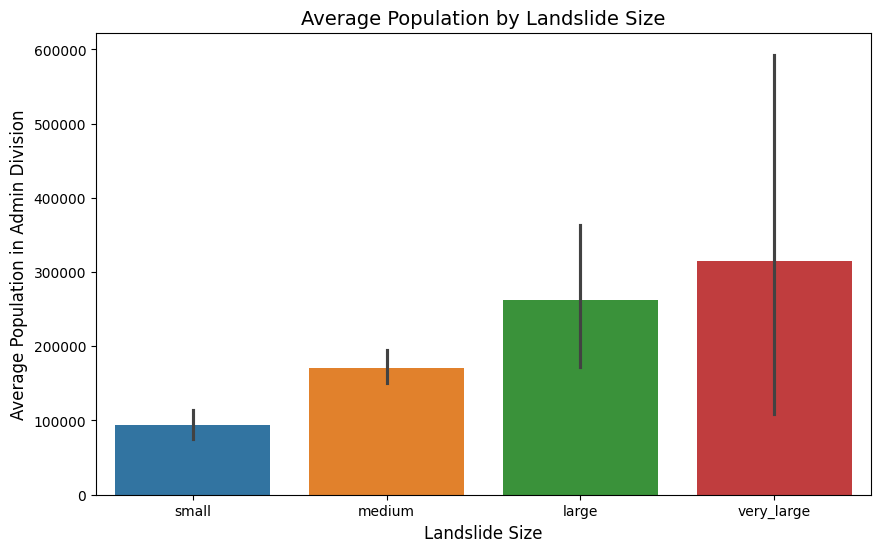

In [170]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='landslide_size', y='admin_division_population', hue='landslide_size', estimator='mean')

plt.xlabel("Landslide Size", fontsize=12)
plt.ylabel("Average Population in Admin Division", fontsize=12)
plt.title("Average Population by Landslide Size", fontsize=14)

plt.show()

#Logistic Regression from Scratch


##Helper functions

###Softmax
The softmax function is defined as:

$$ \text{softmax}(z)_i = \frac{\exp(z_i)}{\sum_{j=1}^n \exp(z_j)} $$

where $z \in \mathbb{R}^n. $

In [171]:
import numpy as np

def softmax(z):
  """
  Compute the softmax of a 2D numpy array along the specified axis.
  Parameters:
  z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples

  and n is the number of classes.

  Returns:
  numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
  each row sums to 1 and represents the probability distribution
  over classes for a sample.

  Notes:
  - Applies a normalization trick to prevent numerical instability by subtracting
  the max value in each row before exponentiation.
  """
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

###Categorical Log-Loss
The categorical log-loss for softmax regression is given by:

$$
L(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^n \sum_{c=1}^C y_{i,c} \log(\hat{y}_{i,c})
$$

where:

- $y$ : One-hot encoded true target values of shape  $(n, C)$
- $\hat{y}$: Predicted probabilities from softmax of shape $(n, C)$


In [172]:
# Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
  """
  Compute the cross-entropy loss for a single observation.
  Parameters:
  y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
  y_pred (numpy.ndarray): Predicted probabilities of shape (c,).
  Returns:
  float: Cross-entropy loss for the observation.
  """
  return -np.sum(y_true * np.log(y_pred + 1e-10)) # Add epsilon to prevent log(0)

###Cost Function
The categorical log-loss for a single observation is:

$$
L(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^n \sum_{c=1}^C y_{i,c} \log(\hat{y}_{i,c})
$$

where:

- $y_{i, c}$ : True one-hot value for class $c$
- $\hat{y}_{i, c}$: Predicted probability for class $c$

For $n$ observations, the cost function is:

$$
\text{cost}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n L(y_i, \hat{y}_i)
$$

Substituting $L(y_i, \hat{y}_i) :$

$$
\text{cost}(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^n \sum_{c=1}^C y_{i,c} \log(\hat{y}_{i,c})
$$


In [173]:
# Cost Function for Softmax (Average Loss)
def cost_softmax(X, y, W, b):
  """
  Compute the average cross-entropy cost over all samples.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  float: Average cross-entropy cost over all samples.
  """
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n

###Gradients
For the categorical cross-entropy loss, the gradients are:

$$
\frac{\partial \text{Categorical Log Loss}}{\partial w_c} = -\frac{1}{n} \sum_{i=1}^n (y_{i,c} - \hat{y}_{i,c}) x_i, \quad \forall c \in \{1, \dots, C\}, \tag{1}
$$

$$
\frac{\partial \text{Categorical Log Loss}}{\partial b_c} = -\frac{1}{n} \sum_{i=1}^n (y_{i,c} - \hat{y}_{i,c}), \quad \forall c \in \{1, \dots, C\}. \tag{2}
$$

The weights \( w_c \) and biases \( b_c \) for each class \( c \) are updated as:

$$
w_c \leftarrow w_c - \alpha \frac{\partial \text{Categorical Log Loss}}{\partial w_c}, \quad
b_c \leftarrow b_c - \alpha \frac{\partial \text{Categorical Log Loss}}{\partial b_c}. \tag{3}
$$


In [174]:
# Gradient Computation
def compute_gradient_softmax(X, y, W, b):
  """
  Compute the gradients of the cost function with respect to weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  tuple: Gradients with respect to weights (d, c) and biases (c,).
  """
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n
  grad_b = np.sum(y_pred - y, axis=0) / n
  return grad_W, grad_b

###Gradient Descent

In [175]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  """
  Perform gradient descent to optimize the weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  alpha (float): Learning rate.
  n_iter (int): Number of iterations.
  show_cost (bool): Whether to display the cost at intervals.
  Returns:
  tuple: Optimized weights, biases, and cost history.
  """
  cost_history = []

  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W
    b -= alpha * grad_b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost)

    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")

  return W, b, cost_history

###Decision Rule

1. **Prediction**:  
   - Using the trained weights and bias, the model calculates the probabilities $y_{\text{prob}}$ for each sample in the test set. These probabilities are computed using the softmax function and indicate the likelihood of belonging to each of the $c$ classes.  
   - The softmax probabilities for a sample $i$ are given by:

   $$
   y_{\text{prob},i,j} = \frac{\exp(z_{i,j})}{\sum_{k=1}^c \exp(z_{i,k})}, \quad \text{for } j \in \{1, 2, \dots, c\},
   $$

   where $z_{i,j}$ is the unnormalized logit for class $j$, and $c$ is the total number of classes.

2. **Decision Rule**:  
   - The predicted probabilities $y_{\text{prob},i,j}$ are converted into a discrete class label$\hat{y}_i$ by selecting the class with the highest probability. This decision rule is given by:

   $$
   \hat{y}_i = \underset{j \in \{1, 2, \dots, c\}}{\arg\max} \, y_{\text{prob},i,j}.
   $$

   - For each sample, the class label $\hat{y}_i$ corresponds to the index of the maximum softmax probability, which indicates the most likely class.


In [176]:
# Prediction Function
def predict_softmax(X, W, b):
  """
  Predict the class labels for input data.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  numpy.ndarray: Predicted class labels of shape (n,).
  """
  z = np.dot(X, W) + b
  y_pred = softmax(z)

  return np.argmax(y_pred, axis=1)


###Evaluation Metrics

In [177]:
# # Evaluation Function
# def evaluate_classification(y_true, y_pred):
#   """
#   Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
#   Parameters:
#   y_true (numpy.ndarray): True class labels of shape (n,).
#   y_pred (numpy.ndarray): Predicted class labels of shape (n,).
#   Returns:
#   tuple: Confusion matrix, precision, recall, and F1-score.
#   """
#   from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
#   cm = confusion_matrix(y_true, y_pred)
#   precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
#   recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
#   f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
#   return cm, precision, recall, f1


def evaluate_classification(y_true, y_pred):
  """
  Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.

  Parameters:
  y_true (numpy.ndarray): True class labels of shape (n,).
  y_pred (numpy.ndarray): Predicted class labels of shape (n,).

  Returns:
  tuple: Confusion matrix, precision, recall, and F1-score.
  """
  unique_classes = np.unique(np.concatenate((y_true, y_pred)))  # Get all unique classes
  num_classes = len(unique_classes)

  # Create a confusion matrix
  cm = np.zeros((num_classes, num_classes), dtype=int)
  for i in range(len(y_true)):
      true_idx = np.where(unique_classes == y_true[i])[0][0]
      pred_idx = np.where(unique_classes == y_pred[i])[0][0]
      cm[true_idx, pred_idx] += 1

  # Calculate Precision, Recall, and F1-score (weighted)
  precision, recall, f1 = 0, 0, 0
  total_samples = len(y_true)

  for i, cls in enumerate(unique_classes):
      TP = cm[i, i]  # True Positives
      FP = np.sum(cm[:, i]) - TP  # False Positives
      FN = np.sum(cm[i, :]) - TP  # False Negatives
      TN = total_samples - (TP + FP + FN)  # True Negatives

      # Precision: TP / (TP + FP)
      class_precision = TP / (TP + FP) if (TP + FP) > 0 else 0

      # Recall: TP / (TP + FN)
      class_recall = TP / (TP + FN) if (TP + FN) > 0 else 0

      # F1-score: 2 * (precision * recall) / (precision + recall)
      class_f1 = (2 * class_precision * class_recall) / (class_precision + class_recall) if (class_precision + class_recall) > 0 else 0

      # Weighted Sum
      class_weight = np.sum(cm[i, :]) / total_samples
      precision += class_precision * class_weight
      recall += class_recall * class_weight
      f1 += class_f1 * class_weight

  return cm, precision, recall, f1


###Train Test Split

In [178]:
def custom_train_test_split(input_matrix, output_array, test_size=0.3, random_state = 42):
  """
  Splits dataset into 4 parts input_matrix_train, input_matrix_test, output_array_train, output_array_test

  Parameters:
  input_matrix (np.ndarray): Feature matrix
  output_array (np.ndarray): Label vector
  test_proportion (float): proportion of dataset to include test split (0 < test_proportion < 1)
  random_seed (int) : seed for reproducibility

  Returns:
  input_matrix_train (np.ndarray): Training feature matrix
  input_matrix_test (np.ndarray): Testing feature matrix
  output_array_train (np.ndarray): Training label vector

  output_array_test (np.ndarray): Testing label vector
  """
  # Setting a random seed for reproducibility
  np.random.seed(random_state)

  # Listing out all of the indices of feature matrix
  indices = np.arange(input_matrix.shape[0])

  # Shuffling indices to be randomly oriented
  np.random.shuffle(indices)

  # Calculating size of test according to proportion
  test_split_size = int(len(input_matrix) * test_size)

  # Separatring indices of test and indices of train
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  # Storing train and test data according to indices (Perform the train-test split)
  input_matrix_train = input_matrix[train_indices]
  input_matrix_test = input_matrix[test_indices]
  output_array_train = output_array[train_indices]
  output_array_test = output_array[test_indices]

  return input_matrix_train, input_matrix_test, output_array_train, output_array_test

###Min Max Scaling

In [179]:
# Manually implement Min-Max Scaling
def min_max_scaling(X):
  """
  Scales the feature matrix X using Min-Max scaling to the range [0, 1].

  Parameters:
  X (numpy array): Feature matrix (2D numpy array)

  Returns:
  X_scaled (numpy array): Scaled feature matrix
  """
  # Calculate min and max values for each feature (column)
  X_min = np.min(X, axis=0)
  X_max = np.max(X, axis=0)

  # Apply Min-Max scaling to each feature (column)
  X_scaled = (X - X_min) / (X_max - X_min)

  return X_scaled

In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

##Softmax Regression from Scratch

4
5

Training Softmax Regression Model:


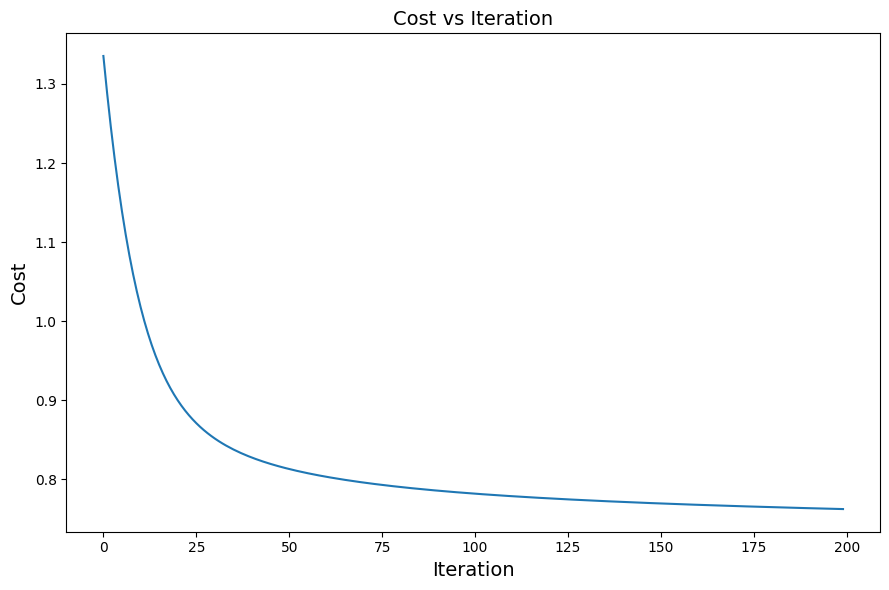

In [181]:
# Feature matrix X and label vector y

X = dataset.drop(columns=['landslide_size'])
y = dataset['landslide_size']

X = min_max_scaling(X).to_numpy()
y_onehot = pd.get_dummies(y, drop_first=False).to_numpy()


# Split data into train and test sets
X_train, X_test, y_train, y_test = custom_train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Intitalizations:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 200

print(num_classes)
print(num_features)

print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=False)

#Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()


In [182]:
# Test model
y_train_pred = predict_softmax(X_train, W, b)
y_test_pred = predict_softmax(X_test, W, b)

# Convert actual y test to 1D array
y_test_true = np.argmax(y_test, axis=1)

# Evaluate train and test performance
train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")



Train Loss (Cost): 0.7624
Test Loss (Cost): 0.7963


In [183]:
print("Shape of X_test:", X_test.shape)
print("Shape of W:", W.shape)
print(y_test_pred.shape)
print(y_test_true.shape)


Shape of X_test: (1786, 5)
Shape of W: (5, 4)
(1786,)
(1786,)


In [184]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

# print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"\nConfusion Matrix:\n{cm}")



Test Accuracy: 70.27%
Precision: 0.49
Recall: 0.70
F1-Score: 0.58

Confusion Matrix:
[[   0  110    0    0]
 [   0 1255    0    0]
 [   0  402    0    0]
 [   0   19    0    0]]


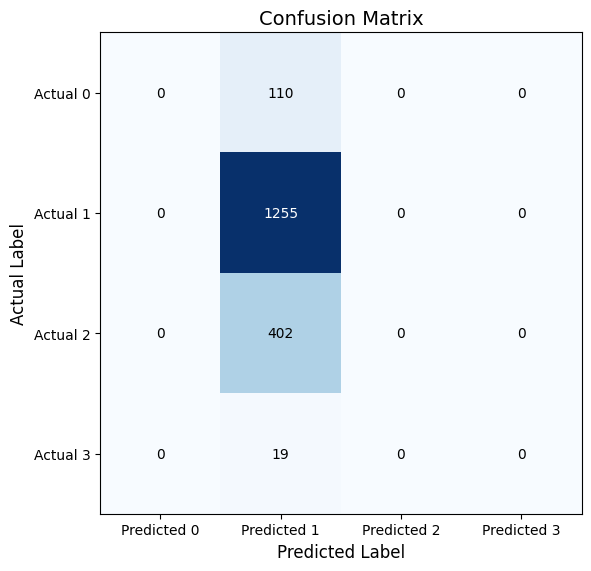

In [185]:
# Visualizing Confusion Matrix
# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues') # Use a color map for better visualization

# Set tick labels for the axes
ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3'])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

#Primary Models

In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8931 entries, 0 to 11032
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_accuracy          8931 non-null   int64  
 1   landslide_size             8931 non-null   object 
 2   admin_division_population  8931 non-null   float64
 3   gazeteer_distance          8931 non-null   float64
 4   latitude                   8931 non-null   float64
 5   longitude                  8931 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 488.4+ KB


In [187]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder


In [188]:
X = dataset.drop(columns=['landslide_size']).to_numpy()
y = dataset['landslide_size'].to_numpy().reshape(-1,1)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the target column (landslide_size)
y_onehot = encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Verify data split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (7144, 5)
Test data shape: (1787, 5)


In [189]:
# --- Initialize Classifiers with default hyperparameters ---
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# --- Train the models ---
# Decision Tree Model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


DecisionTreeClassifier Evaluation:
Accuracy: 0.6357022943480694
              precision    recall  f1-score   support

           0       0.16      0.22      0.19       110
           1       0.76      0.76      0.76      1256
           2       0.43      0.40      0.41       402
           3       0.00      0.00      0.00        19

   micro avg       0.64      0.64      0.64      1787
   macro avg       0.34      0.34      0.34      1787
weighted avg       0.64      0.64      0.64      1787
 samples avg       0.64      0.64      0.64      1787



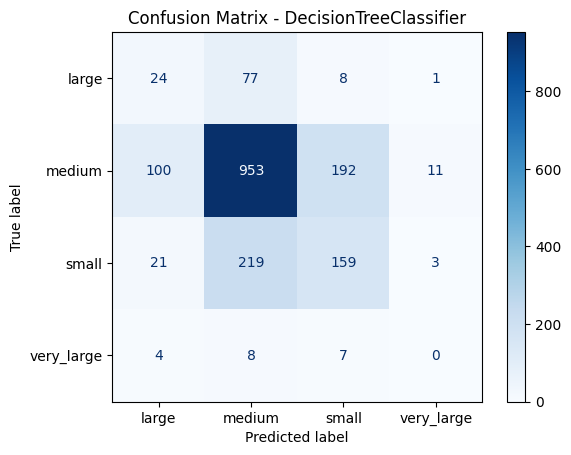

In [190]:
# --- Evaluation for Decision Tree ---
print("DecisionTreeClassifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=0))  # Handle undefined precision

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test.argmax(axis=1), y_pred_dt.argmax(axis=1))  # Convert one-hot to label
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=encoder.categories_[0])
disp_dt.plot(cmap='Blues')
plt.title("Confusion Matrix - DecisionTreeClassifier")
plt.show()

RandomForestClassifier Evaluation:
Accuracy: 0.6955791829882485
              precision    recall  f1-score   support

           0       0.28      0.05      0.08       110
           1       0.76      0.87      0.81      1256
           2       0.57      0.37      0.45       402
           3       0.00      0.00      0.00        19

   micro avg       0.73      0.70      0.71      1787
   macro avg       0.40      0.32      0.33      1787
weighted avg       0.68      0.70      0.68      1787
 samples avg       0.70      0.70      0.70      1787



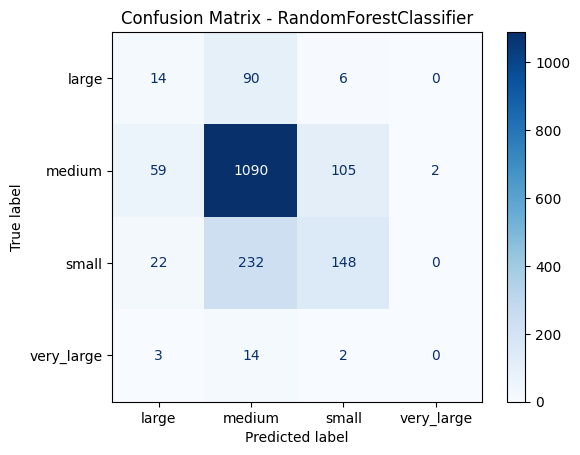

In [191]:
# --- Evaluation for Random Forest ---
print("RandomForestClassifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test.argmax(axis=1), y_pred_rf.argmax(axis=1))  # Convert one-hot to label
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=encoder.categories_[0])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()

#Hyper-parameter Optimization with GridSearchCV

In [192]:
# --- Initialize Classifiers ---
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# --- Hyperparameter Grid Search ---
dt_param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# --- Perform GridSearchCV ---
# Grid Search for Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Print Best Parameters from GridSearch for both models
print("Best Parameters for Decision Tree: ")
for para, val in dt_grid_search.best_params_.items():
  print(f"{para}: {val}")

print("\n")

print("Best Parameters for Random Forest: ")
for para, val in rf_grid_search.best_params_.items():
  print(f"{para}: {val}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Decision Tree: 
min_samples_leaf: 1
min_samples_split: 2


Best Parameters for Random Forest: 
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200


#Feature Selection Using Recursive Feature Elimination

In [193]:
# --- Apply RFE for Feature Selection ---
# Use best model from GridSearchCV for RFE
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_

# Apply RFE for Decision Tree and Random Forest
rfe_dt = RFE(estimator=dt_best_model, n_features_to_select=4)
rfe_rf = RFE(estimator=rf_best_model, n_features_to_select=4)

X_train_rfe_dt = rfe_dt.fit_transform(X_train, y_train)
X_train_rfe_rf = rfe_rf.fit_transform(X_train, y_train)

# Verify the number of selected features
print(f"Selected features by RFE for Decision Tree: {rfe_dt.support_}")
print(f"Selected features by RFE for Random Forest: {rfe_rf.support_}")


Selected features by RFE for Decision Tree: [False  True  True  True  True]
Selected features by RFE for Random Forest: [False  True  True  True  True]


#Final Model

In [194]:
# Choose to Random Forest Classifier as the final model

# --- Rebuild Random Forest Model with Optimized Hyperparameters ---
best_rf_params = rf_grid_search.best_params_

# Initialize the final model with the best parameters from GridSearchCV
final_rf_model = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42
)

# Fit the model with the selected features
X_train_rf = X_train[:,rfe_rf.support_]
X_test_rf = X_test[:,rfe_rf.support_]
final_rf_model.fit(X_train_rf, y_train)

# Predict on the test set
y_pred_rf = final_rf_model.predict(X_test_rf)

Final Model: RandomForestClassifier where hyper-parameters are optimized using GridSearchCV, and 5 best features are selected using RFE 
Accuracy: 0.6922216004476777
              precision    recall  f1-score   support

           0       0.19      0.05      0.07       110
           1       0.76      0.86      0.81      1256
           2       0.55      0.37      0.44       402
           3       0.00      0.00      0.00        19

   micro avg       0.72      0.69      0.71      1787
   macro avg       0.38      0.32      0.33      1787
weighted avg       0.67      0.69      0.67      1787
 samples avg       0.73      0.69      0.69      1787



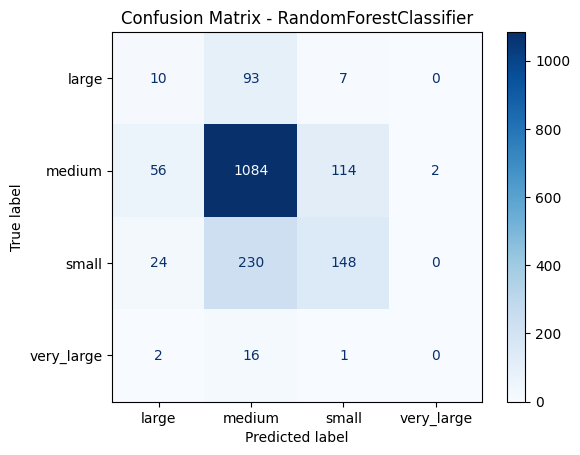

In [195]:
# --- Evaluation for Random Forest ---
print("Final Model: RandomForestClassifier where hyper-parameters are optimized using GridSearchCV, and 5 best features are selected using RFE ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Handle undefined precision

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test.argmax(axis=1), y_pred_rf.argmax(axis=1))  # Convert one-hot to label
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=encoder.categories_[0])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()